In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (5,3)

/var/folders/5h/w_ddszcj1b9581y293ys2dw40000gn/T/ipykernel_44971/1458255206.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [18]:
d = pd.read_csv('Data3a.csv')
print(d)

     y      x  f
0    6   8.31  C
1    6   9.44  C
2    6   9.50  C
3   12   9.07  C
4   10  10.16  C
..  ..    ... ..
95   8   9.15  T
96   6   8.52  T
97   8  10.24  T
98   7  10.86  T
99   9   9.97  T

[100 rows x 3 columns]


In [19]:
#data type
print(d.dtypes)

y      int64
x    float64
f     object
dtype: object


In [20]:
#summary statistics
print(d.describe())

                y           x
count  100.000000  100.000000
mean     7.830000   10.089100
std      2.624881    1.008049
min      2.000000    7.190000
25%      6.000000    9.427500
50%      8.000000   10.155000
75%     10.000000   10.685000
max     15.000000   12.400000


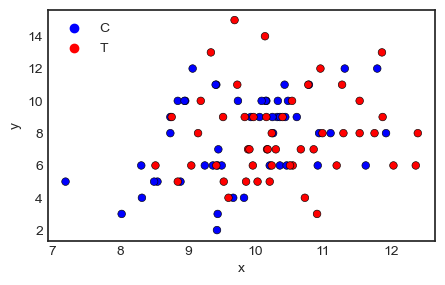

In [21]:
#x,y scatter
palette = {'T': 'r', 'C': 'b'}
sns.scatterplot(data=d, x='x', y='y', hue='f', palette=palette, ec='k', s=30)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

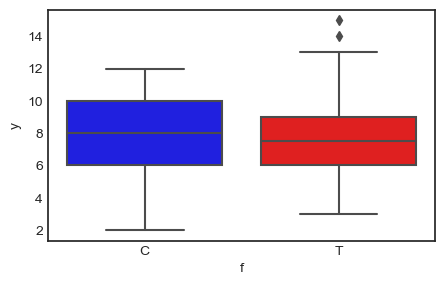

In [22]:
#yをfで分けて箱ひげ図
sns.boxplot(data=d, x='f', y='y', palette=palette)
plt.xlabel('f')
plt.ylabel('y')
plt.show()

In [23]:
#glm
model = smf.glm(formula = 'y ~ x', data=d, family=sm.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 30 May 2024   Deviance:                       84.993
Time:                        12:30:02   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04414
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.0

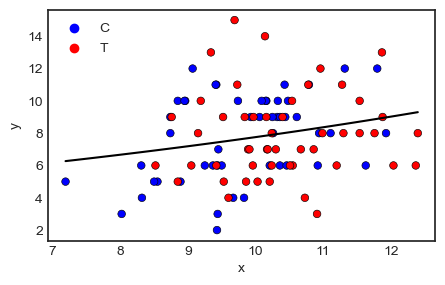

In [24]:
#x,y scatter
palette = {'T': 'r', 'C': 'b'}
sns.scatterplot(data=d, x='x', y='y', hue='f', palette=palette, ec='k', s=30)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

xx = np.linspace(d['x'].min(), d['x'].max(), 100)
yy = model.predict(pd.DataFrame({'x': xx}))
plt.plot(xx, yy, 'k-')

plt.show()

In [25]:
#dのfが'C'の場合は0、'T'の場合は1とする
d['f'] = d['f'].replace(['C', 'T'], [0, 1])
model_f = smf.glm(formula = 'y ~ f', data=d, family=sm.families.Poisson()).fit()
print(model_f.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Thu, 30 May 2024   Deviance:                       89.475
Time:                        12:30:10   Pearson chi2:                     87.1
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0003192
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.0

In [26]:
model_xf = smf.glm(formula = 'y ~ x + f', data=d, family=sm.families.Poisson()).fit()
print(model_xf.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Thu, 30 May 2024   Deviance:                       84.808
Time:                        12:30:19   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04590
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.0

In [27]:
model_identity = smf.glm(formula='y ~ x + f', data=d, family=sm.families.Poisson(link=sm.families.links.Identity())).fit()
print(model_identity.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:               Identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.16
Date:                Thu, 30 May 2024   Deviance:                       84.538
Time:                        12:30:25   Pearson chi2:                     83.6
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04847
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2671      2.843      0.446      0.6

/Users/sa2007/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The Identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "
